## Parcial 2. Ciencia de datos aplicada 

Lizeth Viviana Perdomo Castañeda

In [58]:
%pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ------------------ --------------------- 215.0/456.1 kB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from mlxtend.evaluate import paired_ttest_5x2cv
from imblearn.over_sampling import SMOTE, SMOTENC
import shap

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [3]:
ruta = r'C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Examen\Parcial 2\diabetes_data_complete.csv'
diabetes_df = pd.read_csv(ruta)

In [4]:
print("Resumen del dataset:")
print(diabetes_df.info())

Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100241 entries, 0 to 100240
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                100241 non-null  int64 
 1   encounter_id              100241 non-null  int64 
 2   patient_nbr               100241 non-null  int64 
 3   race                      100241 non-null  object
 4   gender                    100241 non-null  object
 5   age                       100241 non-null  object
 6   admission_type_id         100241 non-null  int64 
 7   discharge_disposition_id  100241 non-null  int64 
 8   admission_source_id       100241 non-null  int64 
 9   time_in_hospital          100241 non-null  int64 
 10  num_lab_procedures        100241 non-null  int64 
 11  num_procedures            100241 non-null  int64 
 12  num_medications           100241 non-null  int64 
 13  number_outpatient         100241 non-n

In [5]:
print("\nEstadísticas descriptivas:")
print(diabetes_df.describe())


Estadísticas descriptivas:
          Unnamed: 0  encounter_id   patient_nbr  admission_type_id  \
count  100241.000000  1.002410e+05  1.002410e+05      100241.000000   
mean    51137.187279  1.660164e+08  5.462896e+07           2.022765   
std     29347.334947  1.026763e+08  3.869475e+07           1.444926   
min         1.000000  1.252200e+04  1.350000e+02           1.000000   
25%     25735.000000  8.556620e+07  2.346089e+07           1.000000   
50%     51264.000000  1.530489e+08  4.604908e+07           1.000000   
75%     76557.000000  2.310624e+08  8.778530e+07           3.000000   
max    101765.000000  4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             100241.000000        100241.000000     100241.000000   
mean                   3.729153             5.760627          4.420307   
std                    5.280776             4.063118          2.991258   
min                    1.000000     

In [6]:
print("\nValores faltantes por columna:")
print(diabetes_df.isnull().sum())


Valores faltantes por columna:
Unnamed: 0                  0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol

In [7]:
diabetes_df.shape

(100241, 44)

In [8]:
diabetes_df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
1,2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
2,3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
3,4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


In [9]:
diabetes_df["race"].value_counts(dropna=False, normalize=True)

race
Caucasian          0.748985
AfricanAmerican    0.188356
Other              0.036632
Hispanic           0.019792
Asian              0.006235
Name: proportion, dtype: float64

In [10]:
diabetes_df["gender"].value_counts(dropna=False, normalize=True)

gender
Female    0.537924
Male      0.462076
Name: proportion, dtype: float64

In [11]:
diabetes_df["age"].value_counts(dropna=False, normalize=True)

age
[70-80)     0.258337
[60-70)     0.222334
[80-90)     0.170489
[50-60)     0.170030
[40-50)     0.094512
[30-40)     0.036073
[90-100)    0.027783
[20-30)     0.015114
[10-20)     0.004679
[0-10)      0.000648
Name: proportion, dtype: float64


Distribución de reingresos:
readmitted
NO     53818
>30    35173
<30    11250
Name: count, dtype: int64


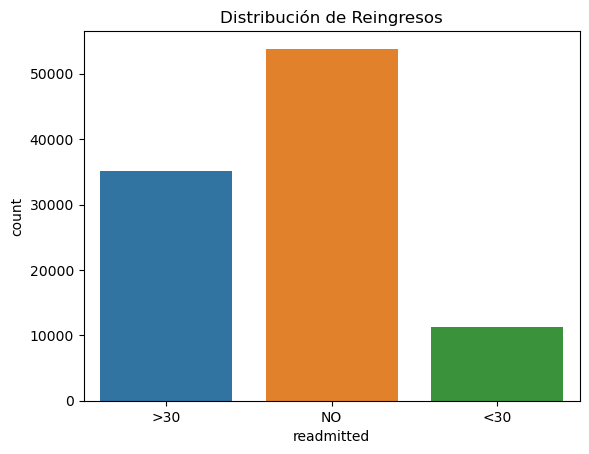

In [12]:
# Distribución de la variable objetivo (readmitted)
if 'readmitted' in diabetes_df.columns:
    print("\nDistribución de reingresos:")
    print(diabetes_df['readmitted'].value_counts())
    sns.countplot(data=diabetes_df, x='readmitted')
    plt.title('Distribución de Reingresos')
    plt.show()

In [13]:
# Verificar los valores únicos antes de transformar
print("Valores únicos antes de la transformación:")
print(diabetes_df['readmitted'].unique())

# Transformar la columna readmitted
diabetes_df['readmitted'] = diabetes_df['readmitted'].map({'NO': 0, '<30': 1, '>30': 1})

# Verificar los valores únicos después de transformar
print("\nValores únicos después de la transformación:")
print(diabetes_df['readmitted'].unique())

# Comprobar el tipo de la columna
print("\nTipo de dato de la columna 'readmitted':", diabetes_df['readmitted'].dtype)


Valores únicos antes de la transformación:
['>30' 'NO' '<30']

Valores únicos después de la transformación:
[1 0]

Tipo de dato de la columna 'readmitted': int64


In [29]:
# Crear un diccionario para asignar manualmente números a cada rango
age_mapping = {
    '[0-10)': 1,
    '[10-20)': 2,
    '[20-30)': 3,
    '[30-40)': 4,
    '[40-50)': 5,
    '[50-60)': 6,
    '[60-70)': 7,
    '[70-80)': 8,
    '[80-90)': 9,
    '[90-100)': 10
}

# Transformar la columna age utilizando el diccionario
diabetes_df['age'] = diabetes_df['age'].map(age_mapping)

# Verificar la transformación
print("\nPrimeros registros después de la transformación:")
print(diabetes_df[['age']].head())



Primeros registros después de la transformación:
   age
0    2
1    3
2    4
3    5
4    6


###  DecisionTreeClassifier

In [14]:
features = ['age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

In [15]:
pipeline_dt = Pipeline([
    ("transformer", ColumnTransformer([
        ("categorical", OneHotEncoder(), ["age"])
    ], remainder="passthrough")),
    ("classifier",  DecisionTreeClassifier())
]) 

In [16]:
param_grid_dt = {
    "classifier__max_depth": [3,4,5,6,7],
    "classifier__min_samples_leaf" : [5, 10, 15],
    "classifier__criterion": ["gini", "entropy", "log_loss"]
}

In [17]:
grid_dt = GridSearchCV(estimator=pipeline_dt, param_grid=param_grid_dt, scoring=["precision", "recall", "f1", "roc_auc"], refit="f1", cv=5, return_train_score=True)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_df[features], diabetes_df["readmitted"], test_size=0.3, random_state=1)

In [19]:
grid_dt.fit(x_train, y_train)

c:\Users\lperd\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(),
                                                                         ['age'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [5, 10, 15]},
             refit='f1', return_train_score=True,
             scoring=['precision', 'recall', 'f1', 'roc_auc'])

In [20]:
grid_dt.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 5}

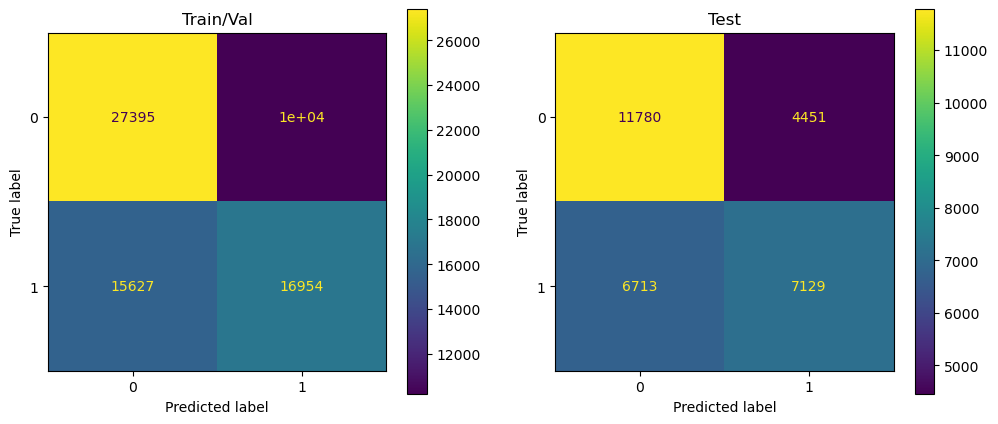

In [21]:
train_val_preds = grid_dt.best_estimator_.predict(x_train)
test_preds = grid_dt.best_estimator_.predict(x_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_val_cm = confusion_matrix(y_train, train_val_preds, labels=grid_dt.best_estimator_.classes_)
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_val_cm, display_labels=grid_dt.best_estimator_.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

test_cm = confusion_matrix(y_test, test_preds, labels=grid_dt.best_estimator_.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=grid_dt.best_estimator_.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

In [22]:
print("Accuracy:")
print("- Train/Val:", accuracy_score(y_train, train_val_preds))
print("- Test:", accuracy_score(y_test, test_preds))
print("Precision:")
print("- Train/Val:", precision_score(y_train, train_val_preds))
print("- Test:", precision_score(y_test, test_preds))
print("\nRecall:")
print("- Train/Val:", recall_score(y_train, train_val_preds))
print("- Test:", recall_score(y_test, test_preds))
print("\nF1:")
print("- Train/Val:", f1_score(y_train, train_val_preds))
print("- Test:", f1_score(y_test, test_preds))
print("\nROC AUC:")
print("- Train/Val:", roc_auc_score(y_train, train_val_preds))
print("- Test:", roc_auc_score(y_test, test_preds))

Accuracy:
- Train/Val: 0.6320402462661042
- Test: 0.628769993016992
Precision:
- Train/Val: 0.6245487364620939
- Test: 0.6156303972366148

Recall:
- Train/Val: 0.5203646296921519
- Test: 0.5150267302412946

F1:
- Train/Val: 0.5677164431496643
- Test: 0.5608528046573834

ROC AUC:
- Train/Val: 0.6246035243067938
- Test: 0.6203992008670586


## RandomForestClassifier

In [23]:
pipeline_rf = Pipeline([
    ("transformer", ColumnTransformer([
        ("categorical", OneHotEncoder(), ["age"])
    ], remainder="passthrough")),
    ("classifier",  RandomForestClassifier(random_state=10))
]) 

In [24]:
param_grid_rf = {
    "classifier__n_estimators": [50, 100, 150],
    "classifier__max_depth" : [3, 4, 5, 6],
    "classifier__class_weight": ["balanced", None]
}

In [25]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=["precision", "recall", "f1", "roc_auc"], refit="f1", cv=5, return_train_score=True)


In [26]:
grid_rf.fit(x_train, y_train)

c:\Users\lperd\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(),
                                                                         ['age'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=10))]),
             param_grid={'classifier__class_weight': ['balanced', None],
                         'classifier__max_depth': [3, 4, 5, 6],
                         'classifier__n_estimators': [50, 100, 150]},
             refit='f1', return_train_score=True,
             scoring=['precision', 'recall', 'f1', 'roc_auc'])

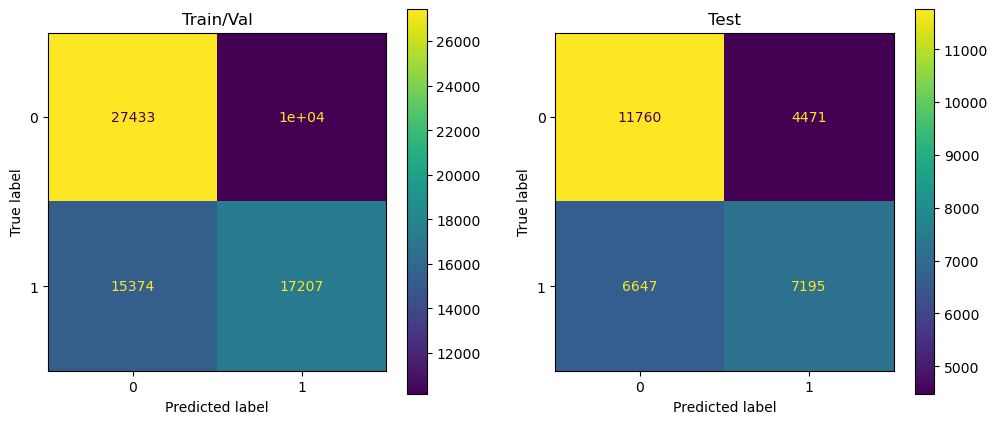

In [27]:
train_val_preds = grid_rf.best_estimator_.predict(x_train)
test_preds = grid_rf.best_estimator_.predict(x_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_val_cm = confusion_matrix(y_train, train_val_preds, labels=grid_rf.best_estimator_.classes_)
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_val_cm, display_labels=grid_rf.best_estimator_.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

test_cm = confusion_matrix(y_test, test_preds, labels=grid_rf.best_estimator_.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=grid_rf.best_estimator_.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

In [28]:
print("Accuracy:")
print("- Train/Val:", accuracy_score(y_train, train_val_preds))
print("- Test:", accuracy_score(y_test, test_preds))
print("Precision:")
print("- Train/Val:", precision_score(y_train, train_val_preds))
print("- Test:", precision_score(y_test, test_preds))
print("\nRecall:")
print("- Train/Val:", recall_score(y_train, train_val_preds))
print("- Test:", recall_score(y_test, test_preds))
print("\nF1:")
print("- Train/Val:", f1_score(y_train, train_val_preds))
print("- Test:", f1_score(y_test, test_preds))
print("\nROC AUC:")
print("- Train/Val:", roc_auc_score(y_train, train_val_preds))
print("- Test:", roc_auc_score(y_test, test_preds))

Accuracy:
- Train/Val: 0.636187435868202
- Test: 0.6302996042962126
Precision:
- Train/Val: 0.6288878330470378
- Test: 0.6167495285444883

Recall:
- Train/Val: 0.5281298916546453
- Test: 0.51979482733709

F1:
- Train/Val: 0.5741216509292316
- Test: 0.5641367414144582

ROC AUC:
- Train/Val: 0.6289916492088108
- Test: 0.6221671444306669


## Regresión Logística

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
# Initializing the model
model = LogisticRegression(penalty="l2", C=0.1, solver="liblinear", class_weight="balanced", random_state=80)
# Training the model using training dataset
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=80,
                   solver='liblinear')

In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=80,
                   solver='liblinear')

In [34]:
pd.DataFrame(np.append(np.array(features).reshape(-1, 1), model.coef_.reshape(-1, 1), axis=1), columns=["feature", "coefficient"])

,feature,coefficient
0,age,0.045054144330748745
1,admission_type_id,0.03911572285071277
2,discharge_disposition_id,-0.06658622465071351
3,admission_source_id,0.03559061841173284
4,time_in_hospital,0.041419645611940795
5,num_lab_procedures,0.02835553147151361
6,num_procedures,-0.09244589739445597
7,num_medications,0.03893054027862246
8,number_outpatient,0.1005716639972854
9,number_emergency,0.1982309501426336


In [ ]:
predictions = model.predict(scaler.transform(x_test))

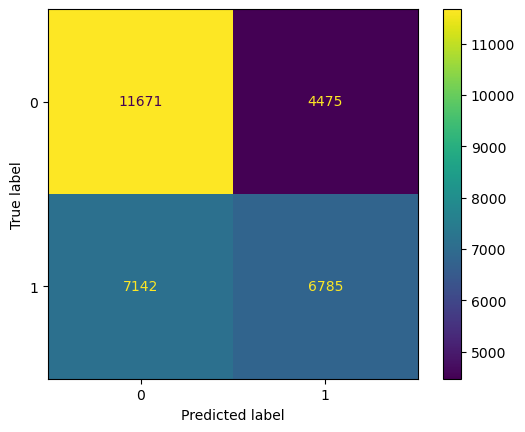

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [ ]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1", f1_score(y_test, predictions))
print("ROC AUC", roc_auc_score(y_test, predictions))

Accuracy: 0.6137066471585808
Precision: 0.6025754884547069
Recall: 0.4871831693832125
F1 0.5387700003970303
ROC AUC 0.6050123700254351


In [56]:
classification_report(y_test, predictions, output_dict=True)

{'0': {'precision': 0.538244830702174,
  'recall': 0.6238679070913684,
  'f1-score': 0.5779020659742039,
  'support': 16231.0},
 '1': {'precision': 0.4578152753108348,
  'recall': 0.3724172807397775,
  'f1-score': 0.4107242450800733,
  'support': 13842.0},
 'accuracy': 0.5081302164732484,
 'macro avg': {'precision': 0.4980300530065044,
  'recall': 0.4981425939155729,
  'f1-score': 0.4943131555271386,
  'support': 30073.0},
 'weighted avg': {'precision': 0.5012247161234185,
  'recall': 0.5081302164732484,
  'f1-score': 0.5009534610190429,
  'support': 30073.0}}

c:\Users\lperd\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


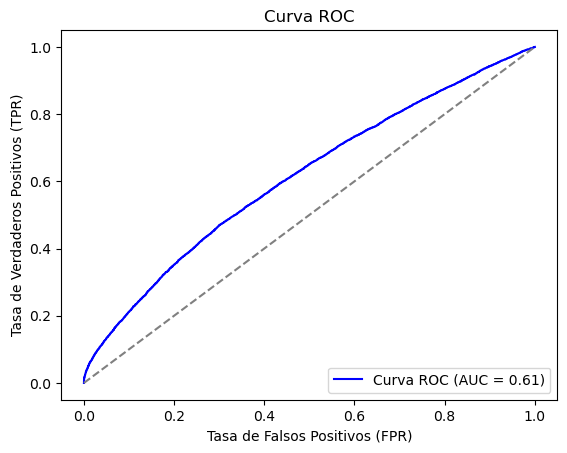

In [ ]:
y_probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia (modelo aleatorio)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

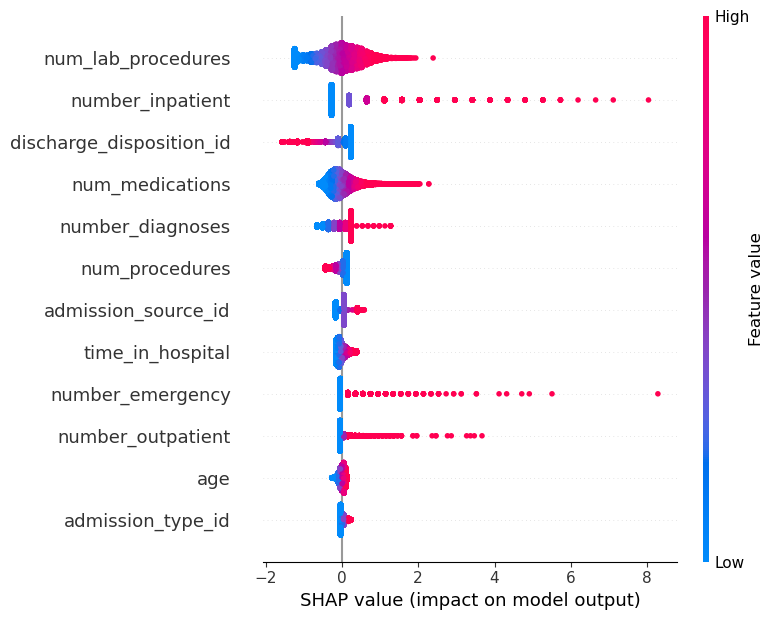

In [73]:
explainer = shap.Explainer(model, x_test)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x_test)

### A/B Testing

In [38]:
control = grid_dt.best_estimator_
variant = grid_rf.best_estimator_

In [ ]:
xtestA, xtestB, ytestA, ytestB = train_test_split(x_test, y_test, test_size=0.5)

In [52]:
ypred_control=control.predict(xtestA)
ypred_variant=variant.predict(xtestB)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

#### t-test 5x2cv

In [41]:
t, p = paired_ttest_5x2cv(estimator1=control, estimator2=variant, X=x_test, y=y_test, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.146, t-Statistic: -1.720


In [42]:
t, p = paired_ttest_5x2cv(estimator1=control, estimator2=variant, X=x_test, y=y_test, scoring='precision', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.511, t-Statistic: 0.707


In [43]:
t, p = paired_ttest_5x2cv(estimator1=control, estimator2=variant, X=x_test, y=y_test, scoring='recall', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.250, t-Statistic: -1.300


Como conclusión vemos que en términos de exactitud, precisión y recall ambos modelos no tienen diferencias significativas.

### Justicia

In [51]:
# Separar las predicciones por género
gender_groups = diabetes_df['gender'].unique()  

# Diccionario para almacenar resultados
fairness_metrics = {}

# Asume que `model` es el modelo entrenado y `xtestA`, `ytestA` son los datos de prueba
for gender in gender_groups:
    # Filtrar los datos por grupo de género
    gender_mask = diabetes_df['gender'] == gender
    x_gender = xtestA[gender_mask]
    y_gender = ytestA[gender_mask]
    
    # Obtener predicciones
    y_pred_gender = grid_rf.best_estimator_.predict(x_gender)
    
    # Calcular métricas y almacenarlas
    fairness_metrics[gender] = classification_report(
        y_gender, y_pred_gender, output_dict=True
    )

# Mostrar resultados
for gender, metrics in fairness_metrics.items():
    print(f"\nMétricas para el género {gender}:")
    print(metrics)


C:\Users\lperd\AppData\Local\Temp\ipykernel_22196\2712403975.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_gender = xtestA[gender_mask]


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
protected_attributes = ['race', 'gender']  

# Añadir predicciones al conjunto de prueba
X_test_with_attributes = X_test.copy()
X_test_with_attributes['race'] = diabetes_df.loc[X_test.index, 'race']
X_test_with_attributes['gender'] = diabetes_df.loc[X_test.index, 'gender']
X_test_with_attributes['true_label'] = Y_test
X_test_with_attributes['predicted_label'] = predictions

# Validar justicia por grupo
for attribute in protected_attributes:
    print(f"\nAnálisis de justicia basado en: {attribute}")
    for group in X_test_with_attributes[attribute].unique():
        group_data = X_test_with_attributes[X_test_with_attributes[attribute] == group]
        
        # Verificar el tamaño del grupo
        print(f"\nGrupo: {group} (Tamaño: {len(group_data)})")
        
        # Matriz de confusión
        cm = confusion_matrix(group_data['true_label'], group_data['predicted_label'])
        print("Matriz de Confusión:")
        print(cm)
        
        # Métricas de clasificación
        report = classification_report(group_data['true_label'], group_data['predicted_label'], zero_division=0)
        print("\nReporte de Clasificación:")
        print(report)



Análisis de justicia basado en: race

Grupo: Caucasian (Tamaño: 22591)
Matriz de Confusión:
[[8430 3484]
 [5433 5244]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.61      0.71      0.65     11914
           1       0.60      0.49      0.54     10677

    accuracy                           0.61     22591
   macro avg       0.60      0.60      0.60     22591
weighted avg       0.60      0.61      0.60     22591


Grupo: AfricanAmerican (Tamaño: 5605)
Matriz de Confusión:
[[2277  751]
 [1315 1262]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69      3028
           1       0.63      0.49      0.55      2577

    accuracy                           0.63      5605
   macro avg       0.63      0.62      0.62      5605
weighted avg       0.63      0.63      0.62      5605


Grupo: Other (Tamaño: 1081)
Matriz de Confusión:
[[597 122]
 [238 124]]

Reporte de 

El modelo es justo en términos de gender 

### Aumento de datos

In [50]:
X = x_train # Características
y = y_train  # Variable objetivo

# Aplicar SMOTE para generar nuevos datos sintéticos
smote = SMOTENC(random_state=42, categorical_features=['age'])
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos aumentados
x_train_augmented = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), 
                                 pd.DataFrame(y_resampled, columns=['readmitted'])], axis=1)

print("Datos originales:", x_train.shape)
print("Datos aumentados:", x_train_augmented.shape)

Datos originales: (70168, 12)
Datos aumentados: (75174, 13)


### Despliegue

Para modelos online la petición y respuesta deben ser mediante una API

Para modelos offline se debe hacer mediante procesamientos bash y los resultados almacenados en bases de datos





In [ ]:
import joblib

# Guardar el modelo
joblib.dump(model, 'logistic_regression_model.pkl')

# Cargar el modelo en producción
model_load = joblib.load('logistic_regression_model.pkl')


API

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Cargar el modelo y el escalador
model = joblib.load('logistic_regression_model.pkl')
scaler = joblib.load('scaler.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    # Preprocesar los datos
    X = scaler.transform([data['features']])
    prediction = model.predict(X)
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


Usa Docker para encapsular la aplicación y el modelo en un contenedor

In [ ]:
# Dockerfile
FROM python:3.9-slim
WORKDIR /app
COPY . .
RUN pip install -r requirements.txt
CMD ["python", "app.py"]


Desplegar con Kubernetes

Para la Clínica de los Alpes:

1. Despliega el modelo como una API en la nube para que los sistemas hospitalarios puedan enviar datos de pacientes en tiempo real.
2. Proporciona la predicción del riesgo de reingreso al personal médico a través de una interfaz gráfica o integración con su sistema de gestión hospitalaria.
3. Monitorea el rendimiento y recopila nuevos datos para reentrenar el modelo periódicamente.